Demoing a color map

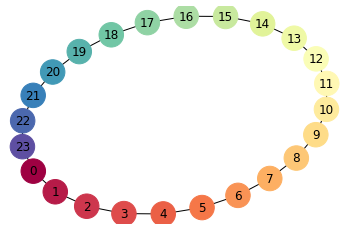

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.cycle_graph(24)
pos = nx.spring_layout(G, iterations=200)
cmap=plt.cm.Spectral
#is cmap=plt.cm.Blues
nx.draw_networkx_labels(G, pos)
nx.draw(G, pos, node_color=range(24), node_size=600, cmap=cmap)

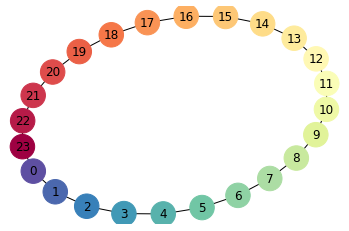

In [3]:
nx.draw_networkx_labels(G, pos)
nx.draw(G, pos, node_color=range(24), node_size=600, cmap=plt.cm.Spectral_r)

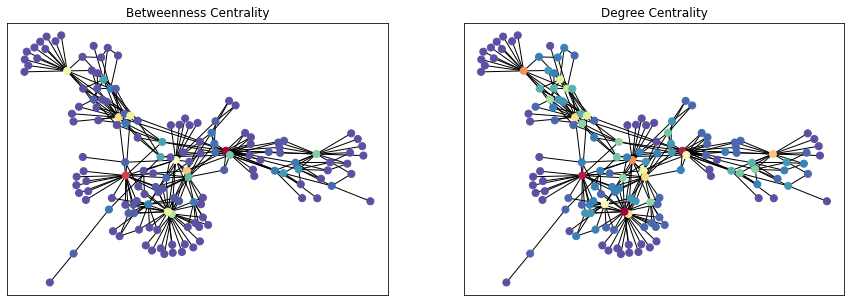

In [6]:
### import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


###. Pick a graph type with some randomness parameters
##. The truly random graphs dont develop much clique structure
#g0 = nx.fast_gnp_random_graph(150, .1, directed = False)
#seed, node_size, k_fac = 28, 70, .5
#g0 = nx.erdos_renyi_graph(150, .1, seed=seed)
# Next two HAVE Cliques but a little too predictably
#g0 = nx.ring_of_cliques(30, 5) # num cliques, size of cliques
#g0 = nx.connected_caveman_graph(30, 5)
# Not enough clique-yness for fun. Use newman_watts_strogatz instead
#g0 = nx.watts_strogatz_graph(150, 12, .1, seed=seed)
#seed, node_size, k_fac = 42, 70, .5
#g0 = nx.newman_watts_strogatz_graph(150, 12, .3, seed=seed)
##. The power law graphs all look alike.  Can get them to develop multiple hubs.  Why?
#g0 = nx.barabasi_albert_graph(250, 4, seed=seed)
# A lot like barabasi albert
#g0 = nx.powerlaw_cluster_graph(150, 12, .3, seed)
# Random lobster is kind of cool big diffs between deg cent and between cent.
#g0 = nx.random_lobster(150, .6, .3, seed=seed)
# Very  cute but very archipelago-like
#g0 = nx.random_powerlaw_tree(150,seed=seed, tries=1000)

# Clearest example of diffs between deg cent and between cent.
# because 1st arg is the [fixed] degree of all the nodes, 2nd is N.
#g0 = nx.random_regular_graph(10, 150, seed)
#g0 = nx.connected_watts_strogatz_graph(150, 12, .3, seed=seed)

# Much bigger diffs betwesn betweenness and degree pictures
#seed,node_size, k_fac  = 12, 50, .25
#g0 = nx.random_geometric_graph(150, 0.225)
# Very interesting biologically inspired network
#41
seed,node_size, k_fac  = 41, 50, .5  # 18 9  37  47   32
g0 = nx.duplication_divergence_graph(150, .5, seed)

###### centrality measures turned into a list
db = nx.betweenness_centrality(g0)
dd = nx.degree_centrality(g0)
db_colors = [db[n] for n in g0.nodes()]
dd_colors = [dd[n] for n in g0.nodes()]
##### End centrality measures ###################

##################################################################
##
##  P l o t t i n g       C o d e
##
##################################################################

# Plotting params

# transparency of edges [lower = more transparent]
alpha, scale=1.0, .3
# optimal distance between nodes increase  to spread nodes out
# default
# k = 1/np.sqrt(len(g0))
k = k_fac/np.sqrt(len(g0))
#######. The all-important choice of a color map!
# dir(plt.cm) for a list of all colormaps
# https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html
# for a fairly abstruse discussion of how to choose a colormap
#cmap=plt.cm.inferno
#cmap=plt.cm.nipy_spectral
# R means reverse
cmap=plt.cm.Spectral_r
#cmap = plt.cm.RdYlBu
#cmap = plt.cm.coolwarm
#scale = .3

# Subplots configuration
fig, axs = plt.subplots(1, 2,figsize = (15,5))
# Layout [same for both plots]
#pos=nx.spring_layout(g0,scale=scale, k = k,seed=seed)
pos=nx.spring_layout(g0,scale=scale, k = k,seed=seed)

# Draw plot 0
ax = axs[0]
ax.set_title('Betweenness Centrality')
nx.draw_networkx_nodes(g0, pos, node_color=db_colors, node_size=node_size,
                       cmap=cmap, ax =ax)
nx.draw_networkx_edges(g0, pos, alpha=alpha,ax = ax)
# End Draw plot 0

# Draw plot 1
ax = axs[1]
ax.set_title('Degree Centrality')
nx.draw_networkx_nodes(g0, pos, node_color=dd_colors, node_size=node_size,
                       cmap=cmap, ax = ax)
nx.draw_networkx_edges(g0, pos, alpha=alpha, ax = ax)
# End Draw plot 1

## Organizing it

In [ ]:
### import networkx as nx

import numpy as np
import networkx as nx

# Needs Python 3.8 or higher because of use of walrus assignment (:=)
def make_color_dict (G, centrality_measures):
    """
    Given graph G and a list of graph centrality measure fns (networkx),
    return a dictionary whose keys are the name strings of the
    functions in centrality measures, 
    and whose value for any given cm is a list of the cm-centrality scores 
    for each node in G.
    
    This is for passing centrality scores as color choices in networkx draw_nodes (nx)
    nx supports using a color map to map floats to colors, but it has to
    be a list of floats (one for each node) aligned with the node ordering of G.
    """
    return {title_from_fn(cm):[cmap[n] for n in G.nodes()] 
            for cm in centrality_measures
            if (cmap := cm(G))}

def title_from_fn (fn, split_char = '_'):
    """
    `fn` is a function instance, find name string, turn into nice capitalized string
    of words.  Assuming words in function's name are separated by split_char
    """
    return ' '.join(fn.__name__.split(split_char)).title()

def plot_centrality_measures (G, centrality_measures):
    # Display config always 2 cols
    rows, cols = len(centrality_measures)//2, 2
    fig, axs = plt.subplots(rows, cols, figsize = (15,5*rows))
    # Flatten axs so we can access an ax with a single index
    axs = np.ravel(axs)
    # End Display config

    # Layout [same for all n plots]
    # scale seems to be unneeded
    # pos=nx.spring_layout(G, scale=scale, k = k, seed=seed)
    pos=nx.spring_layout(G, k = k, seed=seed)
    c_dict = make_color_dict(G, centrality_measures)
    for (i,centrality_measure) in enumerate(c_dict.keys()):
        ax = axs[i]
        ax.set_title(centrality_measure)
        nx.draw_networkx_nodes(g0, pos, node_color=c_dict[centrality_measure], 
                               node_size=node_size,
                               cmap=cmap, ax =ax)
        nx.draw_networkx_edges(g0, pos, alpha=alpha, ax = ax)

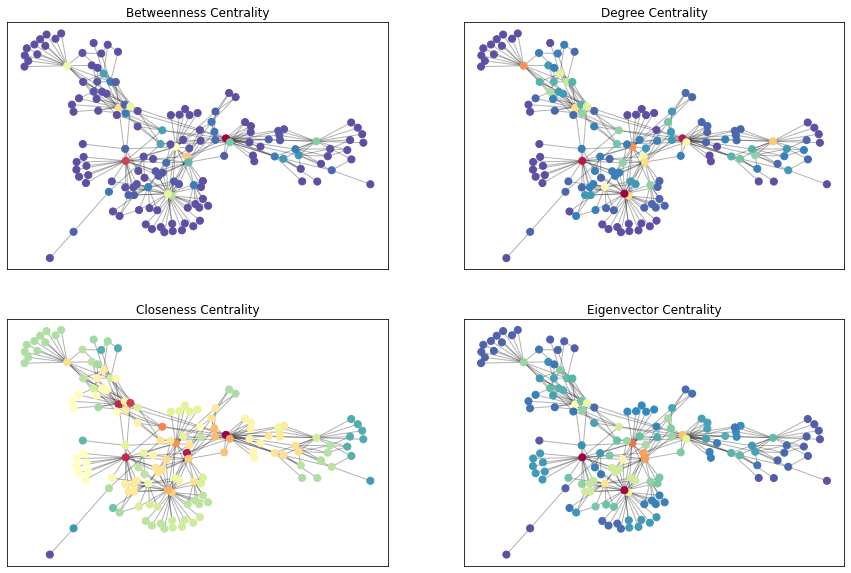

In [ ]:
import matplotlib.pyplot as plt

alpha = .3
cmap=plt.cm.Spectral_r
#scale = .3

# params apprpriate for this graph type
seed,node_size, k_fac  = 41, 50, .5  
g0 = nx.duplication_divergence_graph(150, .5, seed)

#seed, node_size, k_fac = 42, 70, .5
#g0 = nx.newman_watts_strogatz_graph(150, 12, .3, seed=seed)

k = k_fac/np.sqrt(len(g0))

centrality_measures = [nx.betweenness_centrality, nx.degree_centrality,
                       nx.closeness_centrality, nx.eigenvector_centrality]
plot_centrality_measures (g0, centrality_measures)

The code below works for either version of centrality measures (2 measures
or 4). In principle it works for an even numbered number of measures (assuming
an NX2 display grid.

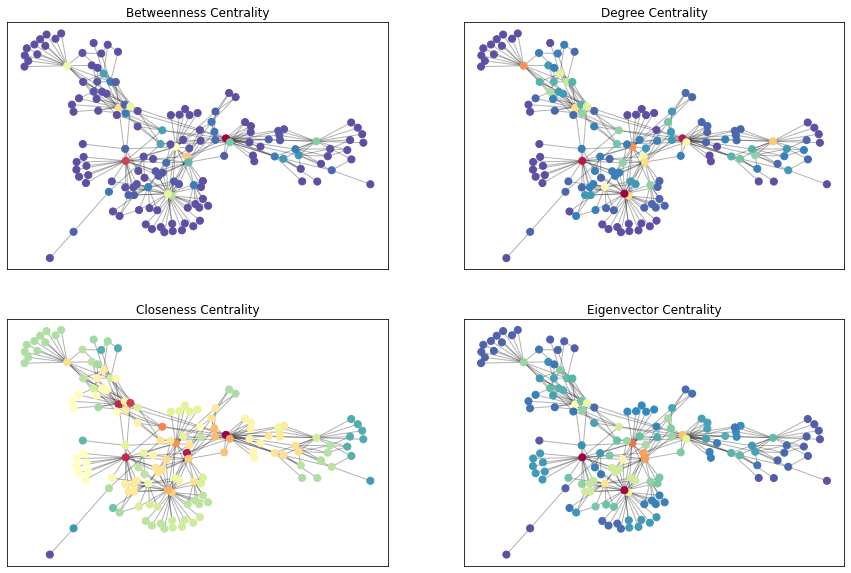

In [ ]:
#centrality_measures = [nx.betweenness_centrality, nx.degree_centrality]
centrality_measures = [nx.betweenness_centrality, nx.degree_centrality,
                     nx.closeness_centrality, nx.eigenvector_centrality]
c_dict = make_color_dict(g0, centrality_measures)

# Display config always 2 cols
rows, cols = len(centrality_measures)//2, 2
fig, axs = plt.subplots(rows, cols, figsize = (15,5*rows))
# Flatten axs so we can access an ax with a single index
axs = np.ravel(axs)
# End Display config

# Layout [same for all n plots]
pos=nx.spring_layout(g0, scale=scale, k = k, seed=seed)

for (i,centrality_measure) in enumerate(c_dict.keys()):
    ax = axs[i]
    ax.set_title(centrality_measure)
    nx.draw_networkx_nodes(g0, pos, node_color=c_dict[centrality_measure], 
                           node_size=node_size,
                           cmap=cmap, ax =ax)
    nx.draw_networkx_edges(g0, pos, alpha=alpha, ax = ax)